# Machine Learning

Machine Learning adalah sebuah teknik untuk membuat *model*

- model --> data + algoritma yang sudah selesai di proses, sebuah machine learning model yang selesai berlatih dan bisa kita gunakan untuk melakukan tujuan tertentu

model machine learning kita buat menggunakan pilihan algoritma (instruksi) tertentu, yang masing masing bertujuan melakukan hal tertentu. misalnya, model regression untuk memprediksi data tipe continuous value. misalnya prediksi harga rumah. prediksi berat badan.

- dataset --> data yang kita gunakan untuk membuat model machine learning
  - training data --> data yang digunakan untuk melatih model machine learning
  - testing data --> data yang kita sisihkan untuk mengetes model machine learning nya seberapa akurat

- features --> kolom data yang kita gunakan sebagai alat latih, pertanyaan, untuk model machine learning
- target --> kolom data yang merupakan jawaban, atau hasil prediksi, sebuah model machine learning

contohnya, misal kita punya data 100 rumah di Bali. ada kolom untuk:
luas tanah, luas bangunan, jenis sertifikat, tahun dibangun, dan harga rumah.

kita bisa bagi 70 data rumah untuk training data. 30 data rumah untuk testing data. kolom luas tanah, luas bangunan, jenis sertifikat, tahun dibangun, untuk features jadi ada 4 features. kolom harga rumah untuk target.

- supervised --> model machine learning yang memerlukan *target*, biasanya digunakan untuk memprediksi *target*
  - regression --> target tipe continuous
  - classification --> target tipe discrete
- unsupervised --> semua machine learning yang tidak perlu *target*, dengan tujuan modelnya berbeda-beda, misalnya untuk
  - clustering (mengelompokkan data), atau
  - dimensional reduction (mengurangi dimensi data), atau lainnya


## Machine Learning Process
1. (data collection) kolek data
2. (data preparation) rapiin data
3. (training) latih model Machine Learning
4. (evaluate) test model Machine Learning nya seberapa akurat
5. (tuning) ulang langkah langkah sebelum sampai kita punya model yang menurut kita sudah ok



# Regression Model

kita mencoba prediksi target menggunakan fitur yang
1. ada korelasi dengan target, dan
2. sifatnya independent dari target

## Linear Regression
menggunakan garis lurus untuk mencari pattern dan membuat model

garis regresi ini bisa di representasikan, dengan formula matematik `y = ax + c` dimana
- y = target
- x = fitur
- a, c = konstan, angka konstan, float atau integer

misalnya y = harga rumah, ternyata bisa dihitung menggunakan formula `harga_rumah = 5.7*luas_rumah_dalam_meter_persegi + 200100000`

## Polynomial Regression
menggunakan garis yang bisa berbelok untuk mencari pattern dan membuat model

garis regresi ini polanya sedikit berbeda dari tipe linear. kita gunakan formula polynomial `y = ax + bx2 + c`

dengan adanya tambahan kuadrat, atau kubik, atau pangkat 4, garis yang dihasilkan formula ini bisa berbelok belok.

# Linear Regression

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#kita gunakan harga melon untuk latihan
#prediksi berat melon dari berat melon
df_melon = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/refs/heads/main/melon.csv")
df_melon

,Weight,Price
0,1,50
1,2,100
2,3,140
3,4,180
4,5,220
5,6,250
6,7,300
7,8,340
8,9,380
9,10,390


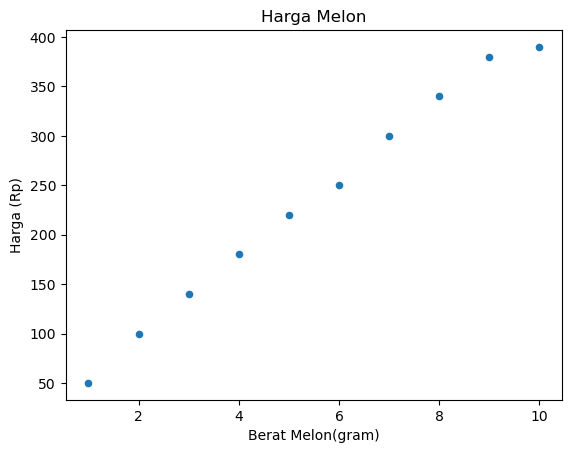

In [11]:
#visualisasi data & regresi model

df_melon.plot(kind='scatter', x='Weight', y="Price")
plt.title("Harga Melon")
plt.xlabel("Berat Melon(gram)")
plt.ylabel("Harga (Rp)")

plt.show()

In [8]:
#fitur & target
fitur = df_melon[['Weight']]
target = df_melon['Price']

In [5]:
#EDA nya skip saja
#train model

model_melon = LinearRegression()

#latih
model_melon.fit(fitur, target)


LinearRegression()

In [20]:
#hasil linear regression spt apa ?
hasil_prediksi = model_melon.predict(df_melon[['Weight']])
hasil_prediksi = pd.DataFrame(hasil_prediksi, columns=["Predicted Price"])
hasil_prediksi

,Predicted Price
0,60.181818
1,99.030303
2,137.878788
3,176.727273
4,215.575758
5,254.424242
6,293.272727
7,332.121212
8,370.969697
9,409.818182


In [21]:
df_melon_prediksi = pd.DataFrame({"Weight": df_melon['Weight'], "Predicted Price": hasil_prediksi["Predicted Price"]})
df_melon_prediksi

,Weight,Predicted Price
0,1,60.181818
1,2,99.030303
2,3,137.878788
3,4,176.727273
4,5,215.575758
5,6,254.424242
6,7,293.272727
7,8,332.121212
8,9,370.969697
9,10,409.818182


<Axes: xlabel='Weight', ylabel='Predicted Price'>

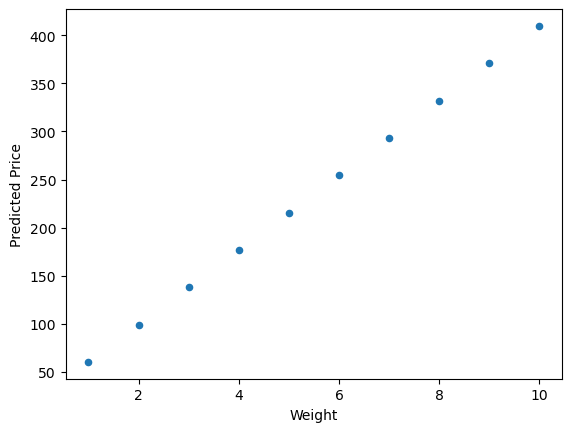

In [24]:
df_melon_prediksi.plot(kind="scatter", x="Weight", y="Predicted Price")

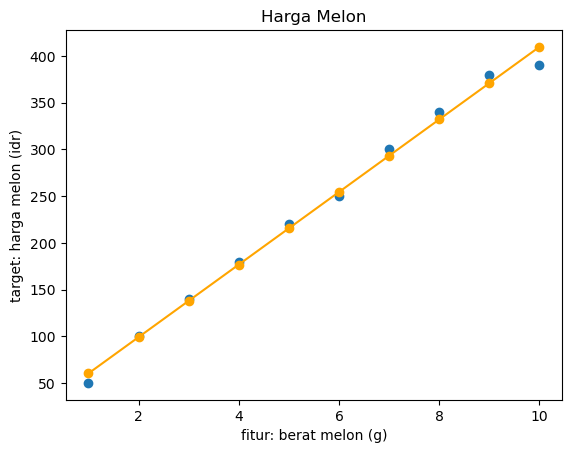

In [26]:
plt.scatter(df_melon["Weight"], df_melon["Price"])
plt.scatter(df_melon_prediksi["Weight"], df_melon_prediksi["Predicted Price"], color="orange")
plt.plot(df_melon_prediksi["Weight"], df_melon_prediksi["Predicted Price"], color="orange")

plt.title("Harga Melon")
plt.xlabel("fitur: berat melon (g)")
plt.ylabel("target: harga melon (idr)")
plt.show()

titik biru = data asli

titik orange = hasil prediksi

cukup dekat artinya bagus

model sudah jadi, bisa dipakai prediksi

In [7]:
#berapa harga melon yg harganya 1000gram / 1kg ?
model_melon.predict([[1000]]) #mesti 2 dimensi ya

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38869.81818182])

hasil prediksi harga melon 1kg = Rp. 38.870,-

## Latihan Pendek - Linear Regression

diberikan data tentang mobil, buatlah model machine learning Linear Regression yang memprediksi `carlength` dari `wheelbase`

data source: https://raw.githubusercontent.com/stefkwan-h8/dataset/refs/heads/main/CarPrice_Assignment.csv

kita bahas di jam 8.30PM WIB

In [28]:
df_mobil = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/refs/heads/main/CarPrice_Assignment.csv")
df_mobil

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [37]:
#data yang akan di pakai
df_mobil2 = df_mobil[['wheelbase', 'carlength']]

#fitur & target
fitur_mobil = df_mobil2[['wheelbase']]
target_mobil = df_mobil2['carlength']

<Axes: xlabel='wheelbase', ylabel='carlength'>

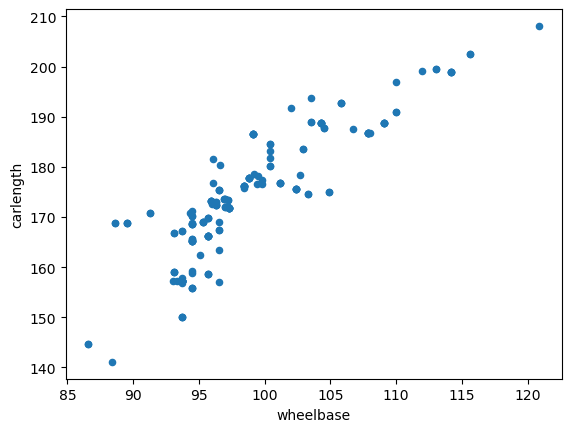

In [42]:
#kondisi awal data
df_mobil2.plot(kind="scatter", x="wheelbase", y="carlength")

In [31]:
model_mobil = LinearRegression()
model_mobil.fit(fitur_mobil, target_mobil)

LinearRegression()

In [38]:
model_mobil.predict([[88.6]]) #mesti 2 dimensi ya

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([155.85032697])

In [43]:
hasil_prediksi_mobil = model_mobil.predict(df_mobil2[['wheelbase']])
hasil_prediksi_mobil = pd.DataFrame(hasil_prediksi_mobil, columns=["Predicted Carlength"])
hasil_prediksi_mobil

,Predicted Carlength
0,155.850327
1,155.850327
2,166.422163
3,175.918897
4,175.202162
...,...
200,192.582977
201,192.582977
202,192.582977
203,192.582977


In [47]:
df_mobil_prediksi = pd.DataFrame({"Wheelbase": df_mobil2['wheelbase'], "Predicted Carlength": hasil_prediksi_mobil["Predicted Carlength"]})
df_mobil_prediksi

,Wheelbase,Predicted Carlength
0,88.6,155.850327
1,88.6,155.850327
2,94.5,166.422163
3,99.8,175.918897
4,99.4,175.202162
...,...,...
200,109.1,192.582977
201,109.1,192.582977
202,109.1,192.582977
203,109.1,192.582977


<Axes: xlabel='Wheelbase', ylabel='Predicted Carlength'>

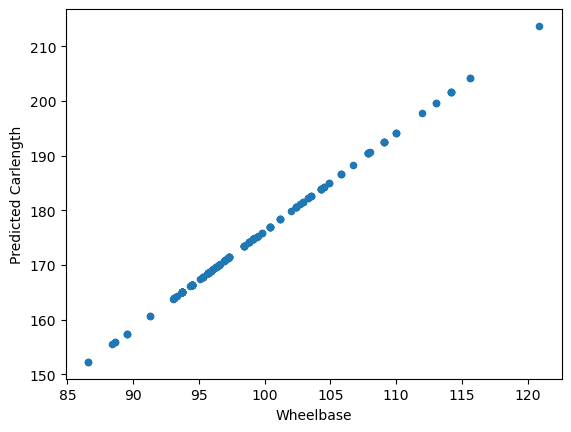

In [48]:
#kondisi data prediksi
df_mobil_prediksi.plot(kind="scatter", x="Wheelbase", y="Predicted Carlength")

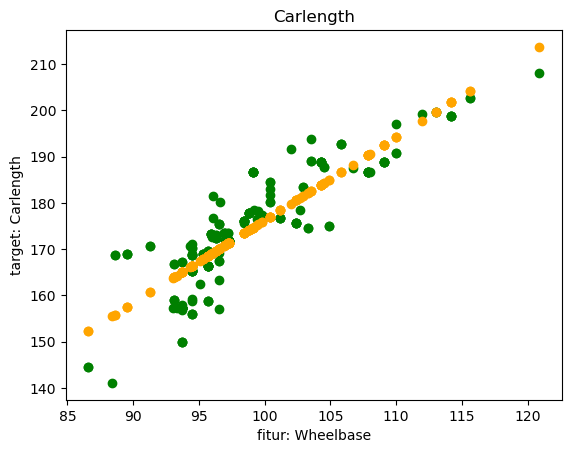

In [50]:
plt.scatter(df_mobil2["wheelbase"], df_mobil2["carlength"], color="Green")
plt.scatter(df_mobil_prediksi["Wheelbase"], df_mobil_prediksi["Predicted Carlength"], color="orange")

plt.title("Carlength")
plt.xlabel("fitur: Wheelbase")
plt.ylabel("target: Carlength")
plt.show()

In [52]:
# split data jadi train dan test
# fitur
from sklearn.model_selection import train_test_split


X = df_mobil[['wheelbase']]
y = df_mobil['carlength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
X_train

,wheelbase
90,94.5
173,102.4
93,94.5
5,99.8
167,98.4
...,...
106,99.2
14,103.5
92,94.5
179,102.9


In [54]:
# pakai data train untuk latihan

model_car = LinearRegression()

model_car.fit(X_train, y_train)

LinearRegression()

In [55]:
# pakai model untuk prediksi

# kita prediksi data dari test data

y_pred = model_car.predict(X_test)

In [56]:
# bandingkan hasil prediksi dengan data aslinya, dari test dataset tadi

perbandingan_test_pred = pd.DataFrame({
    "wheelbase": X_test['wheelbase'],
    "carlength": y_test,
    "predicted carlength": y_pred
    })

perbandingan_test_pred.head()

,wheelbase,carlength,predicted carlength
15,103.5,189.0,182.757909
9,99.5,178.2,175.743785
100,97.2,173.4,171.710663
132,99.1,186.6,175.042372
68,110.0,190.9,194.155862


In [57]:
# untuk melihat akurasi model nya, kita bisa hitung R-squared, perbedaan antara data asli test data dengan data prediksi
# kita juga bisa pakai model.score bawaan dari sklearn Linear Regression model

model_car.score(X_test, y_test)

0.7888297722383653

### Evaluasi Model
R Squared , 0 - 1

0 sangat tidak bagus , sangat jauh antara prediksi dengan data asli

1 kemungkinan tidak bagus / hanya menghapal, karena 100% sama antara data asli dengan yg diprediksi

#### Multiple Features

In [60]:
X = df_mobil[['wheelbase', 'enginesize']]
y = df_mobil['carlength']

X.head()

,wheelbase,enginesize
0,88.6,130
1,88.6,130
2,94.5,152
3,99.8,109
4,99.4,136


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=8 )
X_train.shape

(51, 2)

In [63]:
y_train.shape

(51,)

In [64]:
y_train[:5]

138    156.9
47     199.6
28     174.6
21     157.3
20     158.8
Name: carlength, dtype: float64

In [65]:
#latih model pakai data training
model_car2 = LinearRegression()
model_car2.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model_car2.predict(X_test)
y_pred

array([184.57174403, 170.9831144 , 183.76587604, 190.79214913,
       171.20191123, 170.10328186, 167.62874579, 165.13562885,
       170.69035302, 199.05414185, 159.98753025, 199.05414185,
       183.88903066, 170.9831144 , 165.13562885, 171.20191123,
       166.23425823, 168.06324264, 174.70575735, 159.98753025,
       164.11096403, 172.55614027, 175.49149608, 195.15105331,
       163.75043172, 166.66875508, 168.93223635, 185.50696026,
       195.15105331, 178.73974253, 179.60873624, 187.51484187,
       164.55629972, 167.10325193, 164.55629972, 179.60873624,
       171.20191123, 167.10325193, 174.86142847, 165.4500679 ,
       165.93958957, 166.30667437, 165.72734523, 170.10328186,
       176.23114155, 171.85210811, 166.30667437, 170.69035302,
       197.03387301, 166.23425823, 163.75043172, 164.701132  ,
       170.69035302, 168.06324264, 170.54397233, 179.19710658,
       165.13562885, 191.0818137 , 180.89364594, 169.81052048,
       154.30810306, 169.81052048, 167.62874579, 176.83

In [69]:
perbandingan_car2 = X_test.copy()
perbandingan_car2['carlength'] = y_test
perbandingan_car2['predicted carlength'] = y_pred

perbandingan_car2

,wheelbase,enginesize,carlength,predicted carlength
65,104.9,140,175.0,184.571744
141,97.2,108,172.0,170.983114
194,104.3,141,188.8,183.765876
204,109.1,141,188.8,190.792149
188,97.3,109,171.7,171.201911
...,...,...,...,...
123,103.3,122,174.6,180.926162
36,96.5,92,157.1,168.799791
2,94.5,152,171.2,170.217146
135,99.1,121,186.6,174.705757


In [71]:
#evaluasi model
model_car2.score(X_test, y_test)

0.8051484253491773

kita bisa lihat kalau value R squared dari model dengan 2 fitur ini lebih tinggi dibanding R squared model sebelumnya yang menggunakan 1 fitur.

Artinya model baru kita ini bisa memprediksi carlength dengan kesalahan yang lebih kecil dibanding model sebelum.

# Polynomial Regression

kita bisa gunakan dataset yang sama, kali ini kita pakai model Polynomial Regression

kita bisa test untuk degree 1, 2, dan 3

polynomial regression degree 1 === linear regression

karena code base Linear Regression dan Polynomial Regression sangat mirip, sklearn tidak membuat model terpisah untuk Polynomial Regression. Kita akan gunakan from `from sklearn.preprocessing import PolynomialFeatures` PolynomialFeatures untuk mengubah data kita jadi bentuk Polynomial.

In [73]:
X_train.head()

,wheelbase,enginesize
138,93.7,97
47,113.0,258
28,103.3,122
21,93.7,90
20,94.5,90


In [88]:
X_train.head()

,wheelbase,enginesize
138,93.7,97
47,113.0,258
28,103.3,122
21,93.7,90
20,94.5,90


In [85]:
# kita set mau degree berapa, polynomial regression mau belok berapa kali
n = 2
transformer = PolynomialFeatures(degree=n, include_bias=False)

# data kita ubah
X_train_poly = transformer.fit_transform(X_train)

X_train_poly = pd.DataFrame(X_train_poly)
X_train_poly.head()

,0,1,2,3,4
0,93.7,97.0,8779.69,9088.9,9409.0
1,113.0,258.0,12769.00,29154.0,66564.0
2,103.3,122.0,10670.89,12602.6,14884.0
3,93.7,90.0,8779.69,8433.0,8100.0
4,94.5,90.0,8930.25,8505.0,8100.0


Dalam regresi polinomial, **degree** adalah derajat dari polinomial yang kamu gunakan untuk memodelkan hubungan antara variabel input (X) dan output (Y). Degree ini menentukan kompleksitas dan bentuk kurva yang dihasilkan. 

**Fungsi dari degree**:
- **Degree 1**: Sama dengan regresi linier biasa, di mana hubungan antara X dan Y adalah garis lurus.
- **Degree 2 (kuadratik)**: Hubungan X dan Y membentuk kurva parabola (melengkung ke atas atau ke bawah).
- **Degree 3 (kubik)**: Polinomial kubik dapat membentuk kurva dengan lebih dari satu lekukan atau titik balik, sehingga cocok untuk data yang lebih kompleks.
- **Degree lebih tinggi (4, 5, dst.)**: Memberikan lebih banyak fleksibilitas untuk mengikuti bentuk data yang sangat bervariasi atau melengkung, tapi juga bisa menyebabkan overfitting (model terlalu cocok dengan data sehingga sulit untuk memprediksi data baru).

**Contoh**:
- Jika kamu menggunakan **degree 2**, kamu mendapatkan persamaan \( Y = aX^2 + bX + c \), yang bisa menghasilkan kurva parabola.
- Jika menggunakan **degree 3**, kamu mendapatkan persamaan \( Y = aX^3 + bX^2 + cX + d \), yang bisa menghasilkan kurva dengan lebih dari satu lengkungan.

Semakin tinggi derajatnya, semakin kompleks model yang kamu buat, tapi ini juga bisa membuat model terlalu spesifik dan kurang bisa memprediksi data baru (overfitting). Jadi, memilih degree yang tepat penting untuk mendapatkan keseimbangan antara kecocokan model dan generalisasi.

In [86]:
model_car2_poly = LinearRegression()
model_car2_poly.fit(X_train_poly, y_train)

LinearRegression()

In [89]:
X_test.head()

,wheelbase,enginesize
65,104.9,140
141,97.2,108
194,104.3,141
204,109.1,141
188,97.3,109


In [90]:
X_test_poly = pd.DataFrame(transformer.fit_transform(X_test))

model_car2_poly.predict(X_test_poly)

array([186.24087855, 171.63183145, 185.55508334, 190.8433755 ,
       171.91397906, 170.43251014, 167.16020655, 163.31440665,
       171.2396313 , 194.80786438, 155.64998176, 194.80786438,
       186.23020603, 171.63183145, 163.31440665, 171.91397906,
       164.9988413 , 167.68868167, 176.25779441, 155.64998176,
       161.7198355 , 174.42699213, 177.45195477, 193.4211133 ,
       161.21780161, 165.59460746, 168.82023776, 187.20334049,
       193.4211133 , 180.99332799, 181.70435831, 188.9589817 ,
       162.51181689, 166.21524223, 162.51181689, 181.70435831,
       171.91397906, 166.21524223, 176.55643986, 164.50946451,
       168.93979686, 165.09640867, 164.33521197, 170.43251014,
       178.08683525, 172.72986498, 165.09640867, 171.2396313 ,
       195.12052209, 164.9988413 , 161.21780161, 162.70831956,
       171.2396313 , 167.68868167, 171.04252209, 182.67930802,
       163.31440665, 190.98165805, 183.43718333, 170.03347855,
       144.73080085, 170.03347855, 167.16020655, 178.91

In [91]:
perbandingan_car2_poly = X_test.copy()
perbandingan_car2_poly['carlength'] = y_test
perbandingan_car2_poly['predicted carlength'] = y_pred

perbandingan_car2_poly.head()

,wheelbase,enginesize,carlength,predicted carlength
65,104.9,140,175.0,184.571744
141,97.2,108,172.0,170.983114
194,104.3,141,188.8,183.765876
204,109.1,141,188.8,190.792149
188,97.3,109,171.7,171.201911


In [92]:
model_car2_poly.score(X_test_poly, y_test)

0.8169552777676905

# Kita coba untuk 1 fitur, Polynomial Regression

In [94]:
# kita gunakan data yang sama dengan model Linear Regression 1 fitur 1 target tadi
# split data jadi train dan test
# fitur
X = df_mobil[['wheelbase']]
y = df_mobil['carlength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

R-squared 0.7625073131271535


,wheelbase,carlength,predicted carlength
15,103.5,189.0,184.317313
9,99.5,178.2,176.192311
100,97.2,173.4,171.515637
132,99.1,186.6,175.370056
68,110.0,190.9,195.101707


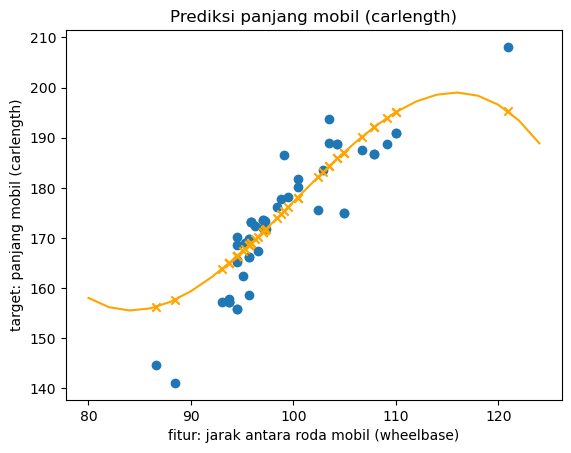

In [110]:
# kita buat jadi versi polynomial rergession
n = 3
transformer = PolynomialFeatures(degree=n, include_bias=False)


X_train_poly = pd.DataFrame(transformer.fit_transform(X_train))

X_test_poly = pd.DataFrame(transformer.fit_transform(X_test))


# latih model
model_car_poly = LinearRegression()
model_car_poly.fit(X_train_poly, y_train)


# cek skor
rs = model_car_poly.score(X_test_poly, y_test)
print("R-squared", rs)


# buat prediksi
y_pred = model_car_poly.predict(X_test_poly)


# membuat data untuk prediksi yang urut
X_test_dummy = np.arange(80, 126, 2).reshape(-1,1)
X_test_dummy_poly = pd.DataFrame(transformer.fit_transform(X_test_dummy))

y_pred_dummy = model_car_poly.predict(X_test_dummy_poly)


# masukin data test dan hasil prediksi ke dataframe (optional)
perbandingan_test_pred = X_test.copy()
perbandingan_test_pred['carlength'] = y_test
perbandingan_test_pred['predicted carlength'] = y_pred

display(perbandingan_test_pred.head())


# visualisasi (optional)
plt.scatter(X_test, y_test)
plt.scatter(perbandingan_test_pred["wheelbase"], perbandingan_test_pred["predicted carlength"], color="orange", marker="x")
# plt.plot(perbandingan_test_pred["wheelbase"], perbandingan_test_pred["predicted carlength"], color="orange")
plt.plot(X_test_dummy, y_pred_dummy, color="orange")

plt.title("Prediksi panjang mobil (carlength)")
plt.xlabel("fitur: jarak antara roda mobil (wheelbase)")
plt.ylabel("target: panjang mobil (carlength)")
plt.show()